In [1]:
import json
import pandas as pd

In [17]:
# Load benchmark details
with open('../data/benchmark.json') as stream:
    benchmark = json.loads(stream.read())

In [12]:
# Load benchmark results

with open('L40S_openmm8.1.2_md_benchmark.out') as stream:
    l40_data = json.loads(stream.read())

with open('A30_openmm8.1.2_md_benchmark.out') as stream:
    A30_data = json.loads(stream.read())

with open('A100_openmm8.1.2_md_benchmark.out') as stream:
    A100_data = json.loads(stream.read())

In [24]:
plot_data = {
    'systems': [f"{sys} ({benchmark[sys]["atoms"]} atoms)" for sys in benchmark],
    'atoms': [benchmark[sys]['atoms'] for sys in benchmark],
    'A30': A30_data.values(),
    'L40S': l40_data.values(),
    'A100': A100_data.values(),
}
df = pd.DataFrame(plot_data)
df.sort_values('atoms', inplace=True)

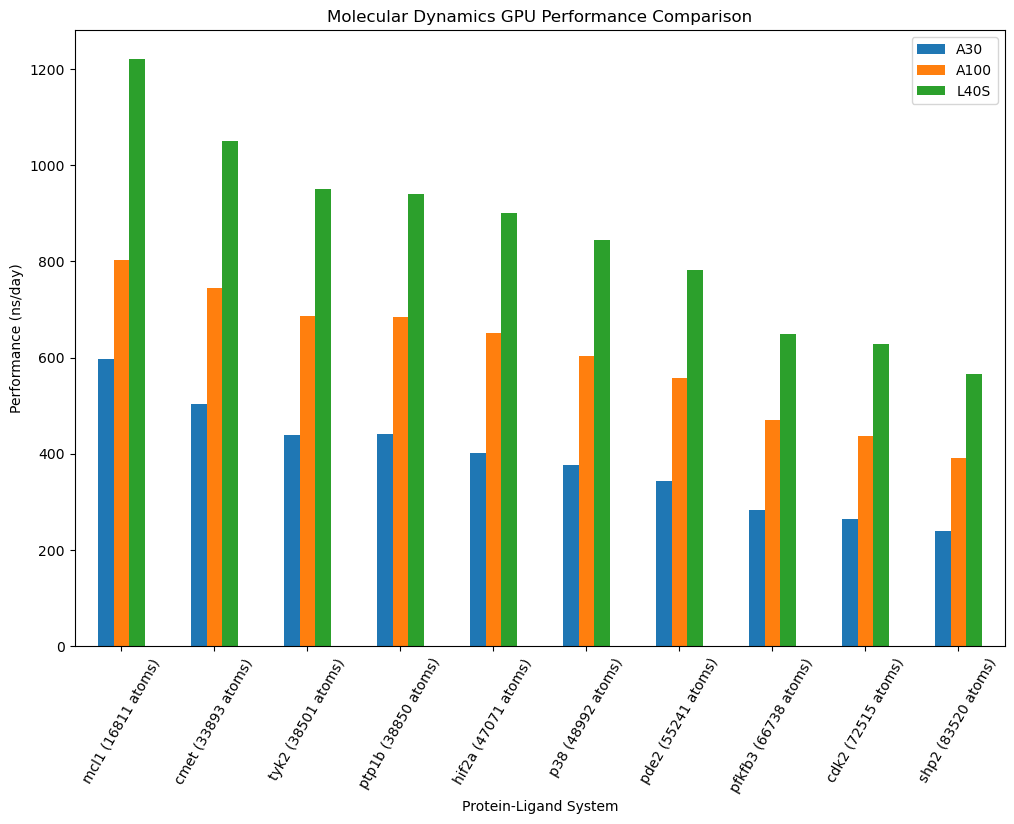

In [37]:
import matplotlib.pyplot as plt

ax = df.plot(x='systems', y=['A30', 'A100', 'L40S'], kind='bar', figsize=(12,8))
ax.set_xticklabels(df['systems'], rotation=60)
plt.title('Molecular Dynamics GPU Performance Comparison')
plt.xlabel('Protein-Ligand System')
plt.ylabel('Performance (ns/day)')
plt.savefig('openmm_md_benchmark.png', bbox_inches="tight")

In [33]:
df['L40S'] / df['A100']

6    1.519303
5    1.409396
0    1.382824
7    1.373723
3    1.380368
1    1.397351
9    1.403226
4    1.375796
8    1.437071
2    1.441327
dtype: float64